<a href="https://colab.research.google.com/github/JenilMP-09/Heart_Disease_Prediction_Project/blob/main/Heart_Disease_Prediction_Project_Using_Different_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --------------------
# IMPORTS
# --------------------

# numerical and tabular data handling:
import numpy as np
import pandas as pd

# plotting / visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn utilities: splitting, scaling, metrics, models, clustering:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# --------------------
# DATA LOADING
# --------------------

# Read CSV file into pandas DataFrame:

df = pd.read_csv("/content/drive/MyDrive/Data_Science_Folder/Datasets/HeartDisease_dataset.csv")

# Show first 5 rows to verify columns and sample values:

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


* Check the description of the data:

In [4]:
# --------------------
# INITIAL EXPLORATION
# --------------------

# Get summary statistics for numeric columns (count, mean, std, min, max, percentiles):

df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


* Check for missing values and data types:

In [5]:
# Show column data types and non-null counts:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

* There are no missing values. So don't need to add code for handling missing values (e.g. fill or drop).

In [6]:
# Example filter: count rows where sex is 'Female' and target == 1:
# This demonstrates how to query and verify categorical labels before mapping:

print(df.query("sex=='Female' and target==1").count())

age                              226
sex                              226
chest_pain_type                  226
resting_blood_pressure           226
cholestoral                      226
fasting_blood_sugar              226
rest_ecg                         226
Max_heart_rate                   226
exercise_induced_angina          226
oldpeak                          226
slope                            226
vessels_colored_by_flourosopy    226
thalassemia                      226
target                           226
dtype: int64


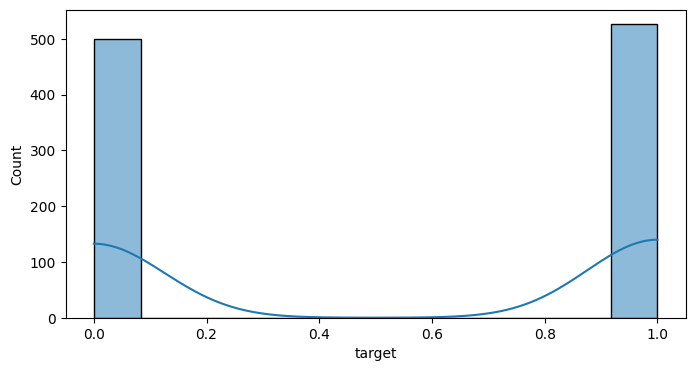

In [7]:
# Plot distribution of the target variable to check class balance (0 = no disease, 1 = disease):

plt.figure(figsize=(8, 4))
sns.histplot(x="target", data=df, kde=True)
plt.show()

* Here, finding unique variables and converting them from categorical to numerical variables using mapping.

In [8]:
# --------------------
# CATEGORICAL MAPPING (TEXT -> NUMERIC)
# --------------------

# Many ML algorithms require numeric input. For each categorical/text column:
#  1) inspect unique values
#  2) visualize counts (optional)
#  3) map text labels to integers

# "sex" column: inspect unique values and then map Male -> 1, Female -> 0:

df["sex"].unique()             # view unique categories

array(['Male', 'Female'], dtype=object)

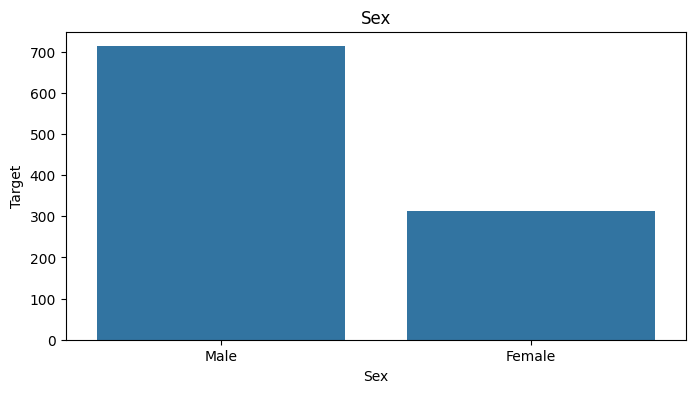

In [9]:
# plot counts by "sex" column:

plt.figure(figsize=(8, 4))
sns.countplot(x="sex", data=df)
plt.xlabel("Sex")
plt.ylabel("Target")
plt.title("Sex")
plt.show()

In [10]:
# mapping to binary:

df["sex"] = df["sex"].map({"Male": 1, "Female": 0})

In [11]:
# chest_pain_type: inspect and map to ordinal-like integers:

df["chest_pain_type"].unique()

array(['Typical angina', 'Atypical angina', 'Non-anginal pain',
       'Asymptomatic'], dtype=object)

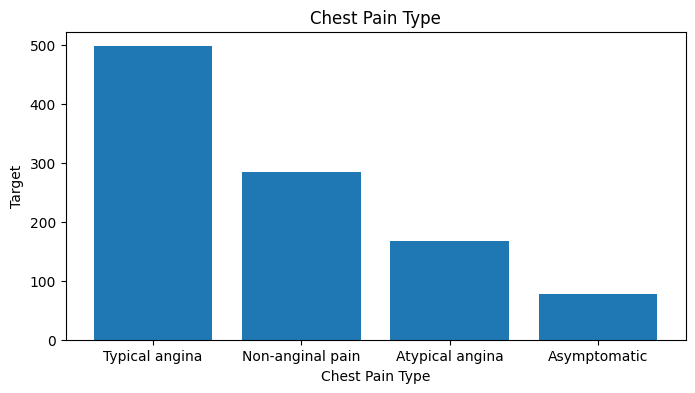

In [12]:
chest_pain_counts = df["chest_pain_type"].value_counts()
chest_pain_counts

plt.figure(figsize=(8, 4))
plt.bar(x=chest_pain_counts.index, height=chest_pain_counts.values, data=df)
plt.xlabel("Chest Pain Type")
plt.ylabel("Target")
plt.title("Chest Pain Type")
plt.show()

In [13]:
"""
Typical angina = 2
Atypical angina = 1
Non-anginal pain = 0
Asymptomatic = 3
"""

df["chest_pain_type"] = df["chest_pain_type"].map({"Typical angina": 2, "Atypical angina": 1, "Non-anginal pain": 0, "Asymptomatic": 3})

In [14]:
# rest_ecg: map textual ECG descriptors to integers:

df["rest_ecg"].unique()

array(['ST-T wave abnormality', 'Normal', 'Left ventricular hypertrophy'],
      dtype=object)

rest_ecg
ST-T wave abnormality           513
Normal                          497
Left ventricular hypertrophy     15
Name: count, dtype: int64


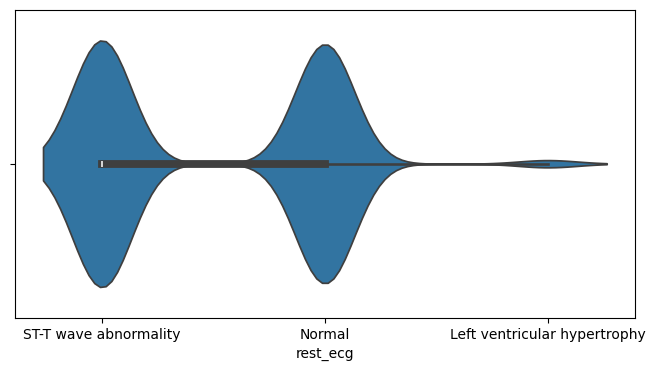

In [15]:
rest_ecg_counts = df["rest_ecg"].value_counts()
print(rest_ecg_counts)

plt.figure(figsize=(8, 4))
sns.violinplot(x="rest_ecg", data=df)
plt.show()

In [16]:
"""
ST-T wave abnormality = 1
Normal = 0
Left ventricular hypertrophy = 2
"""

df["rest_ecg"] = df["rest_ecg"].map({"ST-T wave abnormality": 1, "Normal": 0, "Left ventricular hypertrophy": 2})

In [17]:
# fasting_blood_sugar: clip to binary based on dataset descriptions:
df["fasting_blood_sugar"].unique()

array(['Lower than 120 mg/ml', 'Greater than 120 mg/ml'], dtype=object)

fasting_blood_sugar
Lower than 120 mg/ml      872
Greater than 120 mg/ml    153
Name: count, dtype: int64


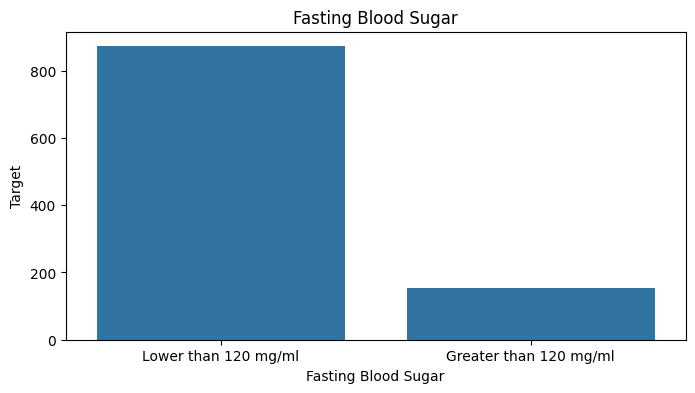

In [18]:
print(df["fasting_blood_sugar"].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x="fasting_blood_sugar", data=df)
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Target")
plt.title("Fasting Blood Sugar")
plt.show()

In [19]:
"""
Lower than 120 mg/ml = 0
Greater  than 120 mg/ml = 1
"""

df["fasting_blood_sugar"] = df["fasting_blood_sugar"].map({"Lower than 120 mg/ml": 0, "Greater than 120 mg/ml": 1})

In [20]:
# exercise_induced_angina: Yes -> 1, No -> 0:
df["exercise_induced_angina"].unique()

array(['No', 'Yes'], dtype=object)

exercise_induced_angina
No     680
Yes    345
Name: count, dtype: int64


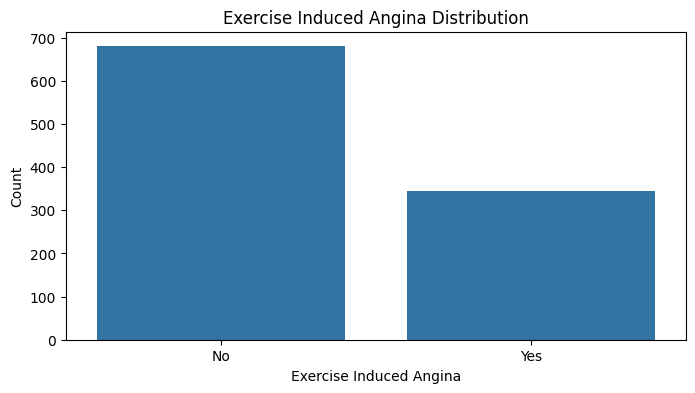

In [21]:
print(df["exercise_induced_angina"].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="exercise_induced_angina")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Count")
plt.title("Exercise Induced Angina Distribution")
plt.show()

In [22]:
"""
Yes = 1
No = 0
"""

df["exercise_induced_angina"] = df["exercise_induced_angina"].map({"Yes": 1, "No": 0})

In [23]:
# slope: map categories to integers:
df["slope"].unique()

array(['Downsloping', 'Upsloping', 'Flat'], dtype=object)

slope
Flat           482
Downsloping    469
Upsloping       74
Name: count, dtype: int64


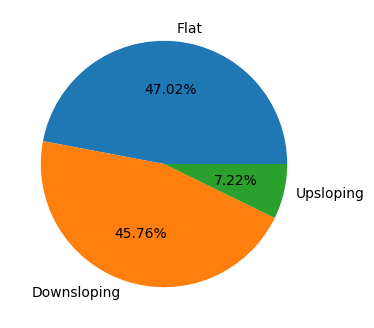

In [24]:
print(df["slope"].value_counts())

plt.figure(figsize=(8, 4))
plt.pie(df["slope"].value_counts().values, labels=df["slope"].value_counts().index, autopct="%0.02f%%")
plt.show()

In [25]:
"""
Downsloping = 0
Upsloping = 2
Flat = 1
"""

df["slope"] = df["slope"].map({"Downsloping": 0, "Upsloping": 2, "Flat": 1})

In [26]:
# vessels_colored_by_flourosopy: textual numbers to ints:
df["vessels_colored_by_flourosopy"].unique()

array(['Two', 'Zero', 'One', 'Three', 'Four'], dtype=object)

vessels_colored_by_flourosopy
Zero     578
One      226
Two      134
Three     69
Four      18
Name: count, dtype: int64


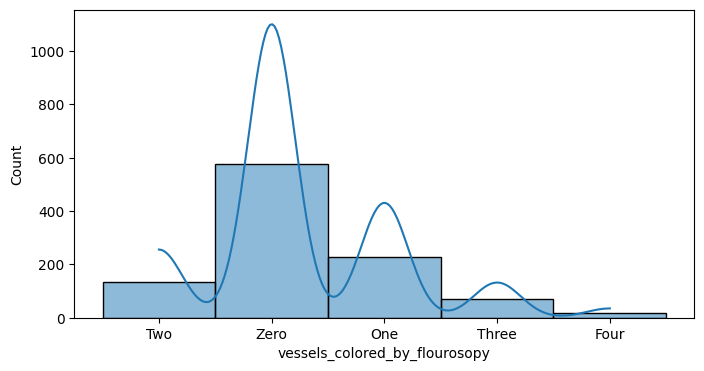

In [27]:
print(df["vessels_colored_by_flourosopy"].value_counts())

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="vessels_colored_by_flourosopy", kde=True)
plt.show()

In [28]:
"""
Zero = 0
One = 1
Two = 2
Three = 3
Four = 4
"""

df["vessels_colored_by_flourosopy"] = df["vessels_colored_by_flourosopy"].map({"Zero": 0, "One": 1, "Two": 2, "Three": 3, "Four": 4})

In [29]:
# thalassemia: map categories; treat 'No' as 'Normal' (0):
df["thalassemia"].unique()

array(['Reversable Defect', 'Fixed Defect', 'Normal', 'No'], dtype=object)

thalassemia
Fixed Defect         544
Reversable Defect    410
Normal                64
No                     7
Name: count, dtype: int64


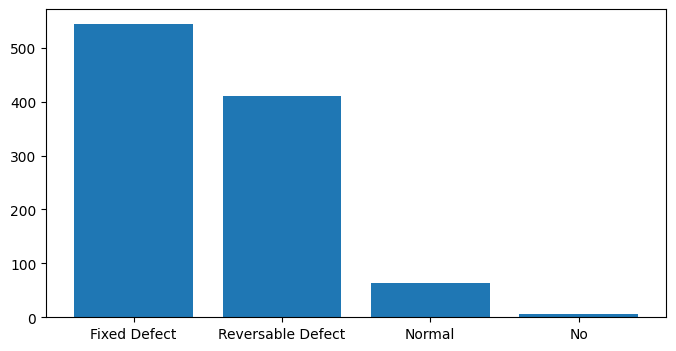

In [30]:
print(df["thalassemia"].value_counts())

plt.figure(figsize=(8, 4))
plt.bar(x=df["thalassemia"].value_counts().index, height=df["thalassemia"].value_counts().values)
plt.show()

In [31]:
"""
Reversable Defect = 2
Fixed Defect = 1
Normal = 0
No = 0
"""

df["thalassemia"] = df["thalassemia"].map({"Reversable Defect": 2, "Fixed Defect": 1, "Normal": 0, "No": 0})

In [32]:
# After mapping, show head and numeric summary to verify transformations:

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,2,125,212,0,1,168,0,1.0,0,2,2,0
1,53,1,2,140,203,1,0,155,1,3.1,2,0,2,0
2,70,1,2,145,174,0,1,125,1,2.6,2,0,2,0
3,61,1,2,148,203,0,1,161,0,0.0,0,1,2,0
4,62,0,2,138,294,1,1,106,0,1.9,1,3,1,0


In [33]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,1.358049,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,0.614634,0.754146,1.330732,0.513171
std,9.072290,0.460373,0.967033,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.600197,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,2.000000,1.000000


In [34]:
# --------------------
# PREPARE FEATURES AND TARGET
# --------------------

# Separate features (X) and target (y):

# drop target column -> features for modeling
X = df.drop("target", axis=1)

# keep target column separately
y = df["target"]

In [35]:
# Split into train/test sets (80/20) with fixed random_state for reproducibility:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Using Linear Regression:**

In [36]:
# --------------------
# SUPERVISED MODELING
# --------------------

# 1) Linear Regression:
# - Fit a regression model to binary target: used only as numeric baseline (MSE/R2).

# fit on training set
linear_reg = LinearRegression().fit(X_train, y_train)
linear_reg

LinearRegression()

In [37]:
y_pred = linear_reg.predict(X_test)    # continuous predictions
y_pred

array([ 1.01181051,  1.07409605,  0.06438186,  0.96521602,  0.16604623,
        0.54451201, -0.03761489, -0.12860729,  0.74934174,  0.05595091,
        0.93771992, -0.12387194,  0.81760509,  0.76426543,  0.27112171,
        0.88192219, -0.04740535,  1.01474682,  0.72450696, -0.02161478,
        0.77447963,  0.17578997,  0.61761257, -0.19119547,  0.77447963,
        0.55041718,  0.95698914,  0.4982373 , -0.07992859,  0.90225005,
        0.68610862,  0.70948256,  0.54827403,  1.07409605,  0.85643655,
        0.69591893,  0.77447963,  0.60238844,  0.75949371,  0.91449779,
       -0.12860729,  0.19063597,  0.59296291,  0.61761257,  0.381066  ,
       -0.23473696,  0.18181244,  0.53281707,  0.69366078,  0.50559809,
        0.61033305, -0.18965345,  0.71277654,  0.10785357,  0.95698914,
        0.75949371,  0.41460245, -0.09760965,  0.48633765,  0.93951617,
        0.63428003,  0.10369437, -0.07992859,  0.50559809, -0.2061748 ,
        0.46538623,  1.22958646,  0.59011294, -0.23473696,  1.09

In [38]:
# Compute regression metrics to evaluate baseline behavior:

print(f"Mean-Squared-Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2-Score: {r2_score(y_test, y_pred)}")

Mean-Squared-Error: 0.14842364635734298
R2-Score: 0.4062912870581249


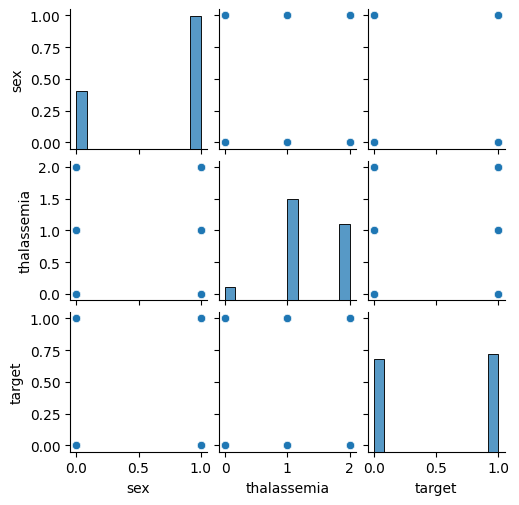

In [39]:
# Optional quick pairplot (can be slow) to visualize relationships:

sns.pairplot(df[["sex", "thalassemia", "target"]], height=1.7)
plt.show()

**Using Logistic Regression:**

In [40]:
# 2) Logistic Regression:
# - Appropriate for binary classification; outputs class probabilities and labels.

logistic_reg = LogisticRegression(max_iter=800, random_state=42).fit(X_train, y_train)
logistic_reg

LogisticRegression(max_iter=800, random_state=42)

In [41]:
y_pred = logistic_reg.predict(X_test)           # predicted labels on test set
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0])

In [42]:
# compute accuracy
acc_log = accuracy_score(y_test, y_pred)
print(f"Accuracy-score: {acc_log}")

Accuracy-score: 0.7853658536585366


In [43]:
print(confusion_matrix(y_test, y_pred))

[[74 28]
 [16 87]]


<Axes: >

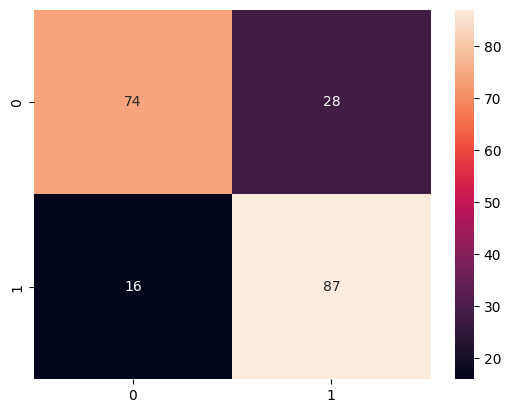

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [45]:
# Classification Report:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       102
           1       0.76      0.84      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.78       205
weighted avg       0.79      0.79      0.78       205



**Using Decision Tree:**

In [46]:
# 3) Decision Tree Classifier:
# - Captures non-linear interactions via hierarchical splits.

decision_tree = DecisionTreeClassifier(criterion="gini", random_state=42).fit(X_train, y_train)
decision_tree

DecisionTreeClassifier(random_state=42)

In [47]:
y_pred = decision_tree.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [48]:
acc_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy-score: {acc_dt}")

Accuracy-score: 0.9853658536585366


In [49]:
print(confusion_matrix(y_test, y_pred))

[[102   0]
 [  3 100]]


<Axes: >

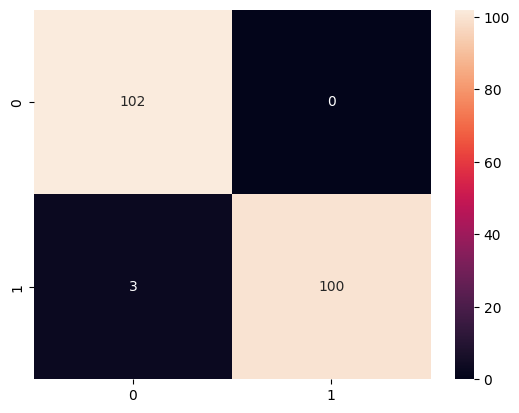

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



**Using Random Forest:**

In [52]:
# 4) Random Forest Classifier:
# - Ensemble of trees reduces variance and often generalizes better than a single tree.

# use single tree depth as an optional constraint:

random_forest = RandomForestClassifier(max_depth=decision_tree.tree_.max_depth, random_state=42).fit(X_train, y_train)

random_forest

RandomForestClassifier(max_depth=12, random_state=42)

In [53]:
y_pred = random_forest.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [54]:
acc_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy-score: {acc_rf}")

Accuracy-score: 0.9853658536585366


In [55]:
print(confusion_matrix(y_test, y_pred))

[[102   0]
 [  3 100]]


<Axes: >

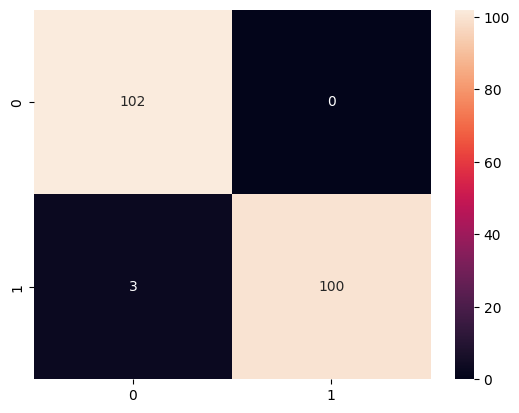

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [58]:
# --------------------
# UNSUPERVISED EXPLORATION: K-MEANS
# --------------------

# Standardize features (mean=0, std=1) before distance-based clustering:

# scale all columns (including target here)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# convert back to DataFrame for convenience
df = pd.DataFrame(scaled_df, columns=df.columns)
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,-0.268437,0.661504,0.664160,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,-0.995433,1.209221,1.115626,-1.026698
1,-0.158157,0.661504,0.664160,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,2.243675,-0.731971,1.115626,-1.026698
2,1.716595,0.661504,0.664160,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,2.243675,-0.731971,1.115626,-1.026698
3,0.724079,0.661504,0.664160,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,-0.995433,0.238625,1.115626,-1.026698
4,0.834359,-1.511706,0.664160,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,0.624121,2.179817,-0.551308,-1.026698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,-0.370436,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,-0.995433,-0.731971,-0.551308,0.973997
1021,0.613800,0.661504,0.664160,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,0.624121,0.238625,1.115626,-1.026698
1022,-0.819834,0.661504,0.664160,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,0.624121,0.238625,-0.551308,-1.026698
1023,-0.488996,-1.511706,0.664160,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,-0.995433,-0.731971,-0.551308,0.973997


In [59]:
# For clustering we consider only features (drop target):

X_clust = df.drop("target", axis=1)

# scaled target retained for later analysis if needed
y_clust = df["target"]

In [60]:
# Split clustering data to mirror supervised split:

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_clust, y_clust, test_size=0.2, random_state=42)

**Using K-Means:**

In [61]:
# Use elbow method (WCSS) and silhouette score to choose cluster count:

k = list(range(2, 11))        # candidate cluster counts

# inertia (within-cluster sum of squares)
wcss = []

silhouette_scores = []            # silhouette scores

for no in k:
  # instantiate KMeans
  kmeans = KMeans(n_clusters=no, random_state=42)

  # fit to training portion
  kmeans.fit(Xc_train)

  # store inertia value
  wcss.append(kmeans.inertia_)

  # compute silhouette
  silhouette_scores.append(silhouette_score(Xc_train, kmeans.labels_))

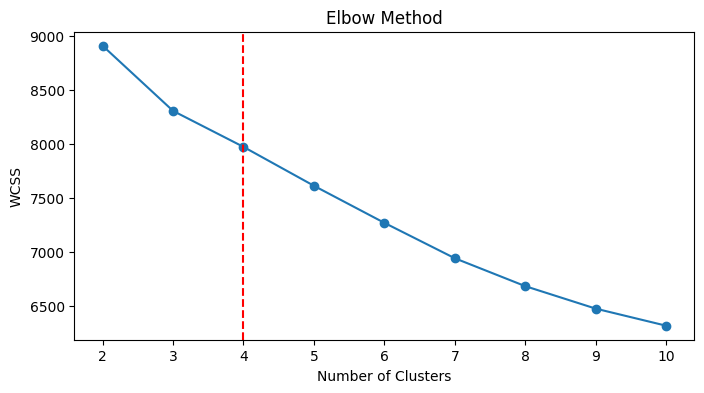

In [62]:
# Plot elbow (WCSS vs k):

plt.figure(figsize=(8, 4))
plt.plot(k, wcss, marker="o")
plt.axvline(x=4, color="red", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [63]:
# Choose k=4 (example) and compute silhouette score for validation:

kmeans = KMeans(n_clusters=4, random_state=42).fit(Xc_train)
kmeans

KMeans(n_clusters=4, random_state=42)

In [64]:
labels = kmeans.predict(Xc_train)
labels

array([1, 3, 1, 0, 1, 0, 2, 0, 1, 3, 2, 3, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       1, 2, 3, 0, 3, 2, 3, 3, 3, 0, 2, 1, 1, 3, 1, 0, 2, 2, 2, 3, 1, 3,
       2, 0, 2, 2, 2, 3, 0, 2, 0, 2, 1, 2, 3, 1, 2, 3, 3, 2, 0, 2, 1, 2,
       0, 1, 1, 2, 1, 0, 3, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 3, 3, 3, 0, 0,
       1, 3, 3, 0, 3, 0, 0, 1, 2, 0, 0, 3, 2, 3, 1, 0, 2, 1, 1, 0, 1, 3,
       2, 2, 1, 2, 0, 2, 0, 0, 1, 3, 2, 0, 2, 3, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 2, 3, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1,
       0, 3, 3, 1, 1, 3, 0, 0, 0, 0, 3, 2, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0,
       0, 1, 0, 1, 1, 3, 3, 0, 3, 3, 2, 3, 0, 0, 0, 0, 1, 2, 0, 3, 1, 1,
       3, 2, 3, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0,
       1, 0, 2, 0, 1, 2, 3, 3, 3, 3, 3, 2, 2, 1, 0, 3, 3, 3, 0, 2, 0, 1,
       0, 1, 0, 2, 0, 3, 0, 0, 0, 1, 3, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 3,
       0, 3, 3, 1, 0, 0, 1, 3, 2, 2, 2, 1, 0, 1, 2, 0, 0, 3, 0, 1, 3, 3,
       2, 2, 2, 3, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1,

In [65]:
print(f"Silhouette-score: {silhouette_score(Xc_train, labels)}")

Silhouette-score: 0.11023534803385758


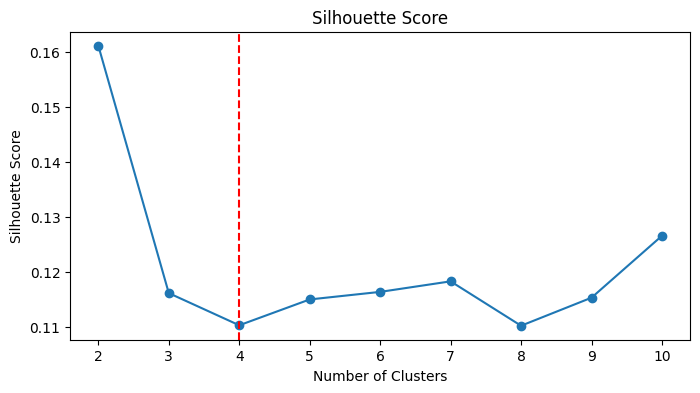

In [66]:
# Plot silhouette scores across k:

plt.figure(figsize=(8, 4))
plt.plot(k, silhouette_scores, marker="o")
plt.axvline(x=4, color="red", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [67]:
# --------------------
# CONCLUSION & ANALYSIS
# --------------------
# Collect supervised model accuracies for comparison.

accuracies = {
    "Logistic Regression": acc_log,
    "Decision Tree": acc_dt,
    "Random Forest": acc_rf
}

In [68]:
# Determine the best model based on test set accuracy from this single split.

# model with highest accuracy:
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

In [69]:
# Print concise conclusion summarizing which model performed best on the held-out test set.

print("----- Conclusion -----")
print(f"Best supervised model by test accuracy: {best_model_name} (accuracy = {best_accuracy:.4f})")

----- Conclusion -----
Best supervised model by test accuracy: Decision Tree (accuracy = 0.9854)
